# Mathematics in Machine Learning project

In [1]:
import os
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('adult.data.csv',sep=",")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data exploration and dataset cleaning

In [3]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [4]:
print(data['workclass'].value_counts())
print(data['occupation'].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


Remove the rows containing invalid values for 'occupation', 'workclass' or 'native-country'.

In [5]:
len(data[(data['occupation']=='?') | (data['workclass']=='?') | (data['native-country']=='?')].index)

2399

In [6]:
data = data.drop(data[(data['occupation']=='?') | (data['workclass']=='?') | (data['native-country']=='?')].index)

In [7]:
data['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [8]:
data['native-country'] = [x if x == 'United-States' else 'Other' for x in data['native-country']]

Text(0.5, 0, 'Native country')

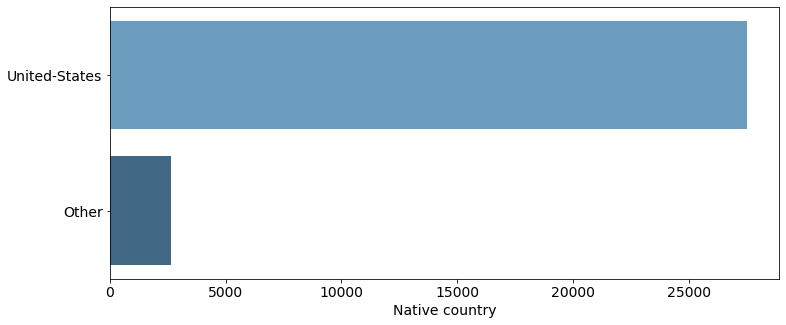

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
g = sns.barplot(x=data['native-country'].value_counts(), y=data['native-country'].value_counts().keys(), palette="Blues_d")
g.tick_params(labelsize=14)
g.set_xlabel("Native country", fontsize=14)

Select only the data related to individuals born in United-States.

In [10]:
data = data[data['native-country']== "United-States"]
data = data.drop('native-country', axis=1)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Salary')

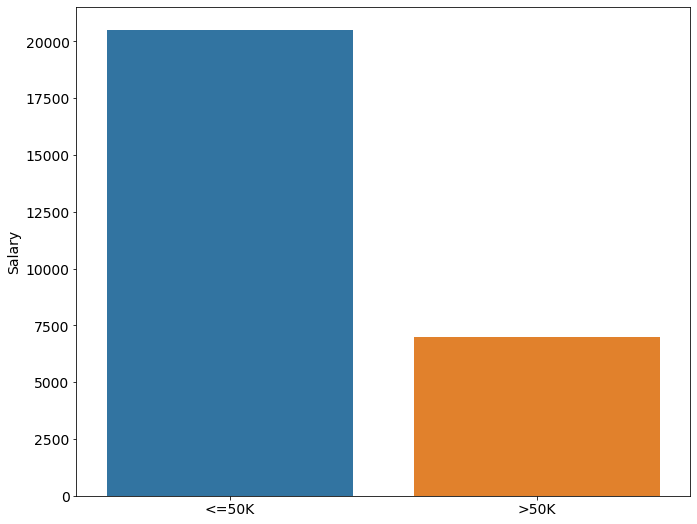

In [11]:
fig, ax = plt.subplots(figsize=(11,9))
g = sns.barplot(data['salary'].value_counts().keys(), data['salary'].value_counts())
g.tick_params(labelsize=14)
g.set_ylabel("Salary", fontsize=14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27504 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27504 non-null  int64 
 1   workclass       27504 non-null  object
 2   fnlwgt          27504 non-null  int64 
 3   education       27504 non-null  object
 4   education-num   27504 non-null  int64 
 5   marital-status  27504 non-null  object
 6   occupation      27504 non-null  object
 7   relationship    27504 non-null  object
 8   race            27504 non-null  object
 9   sex             27504 non-null  object
 10  capital-gain    27504 non-null  int64 
 11  capital-loss    27504 non-null  int64 
 12  hours-per-week  27504 non-null  int64 
 13  salary          27504 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.1+ MB


In [13]:
int_data = data.select_dtypes("int")
int_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
5,37,284582,14,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [14]:
int_data_with_target = pd.concat((int_data,data['salary']), axis=1)

In [15]:
categorical_data = data.select_dtypes("object")
categorical_data

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


Naive country of most of the individuals in the dataset is "United-States"  

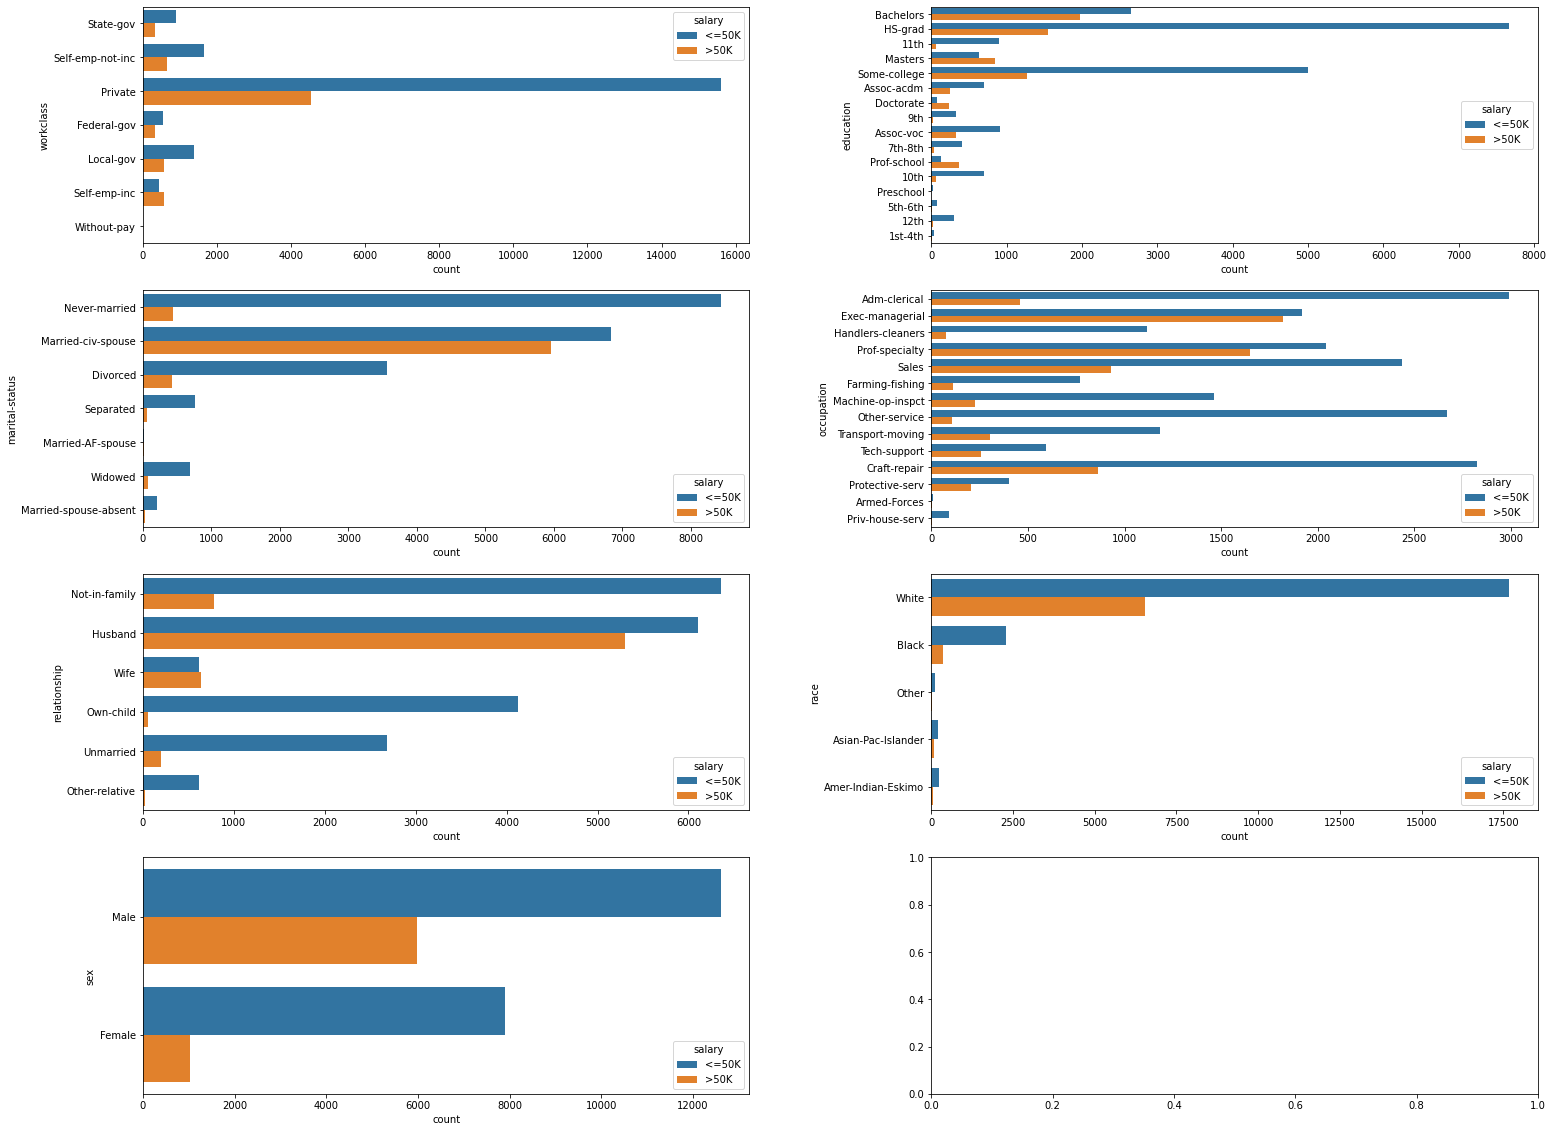

In [16]:
fig, axes = plt.subplots(4,2, figsize = (25,20))
plt.subplots_adjust(wspace = .3)
sub = []
for (i,col) in enumerate(categorical_data.columns):
  if col != 'salary':
    ax = sns.countplot(y=col, hue='salary', data=categorical_data, ax=axes[i//2, i-2*i//2+i%2])


Text(0.5, 0, 'count')

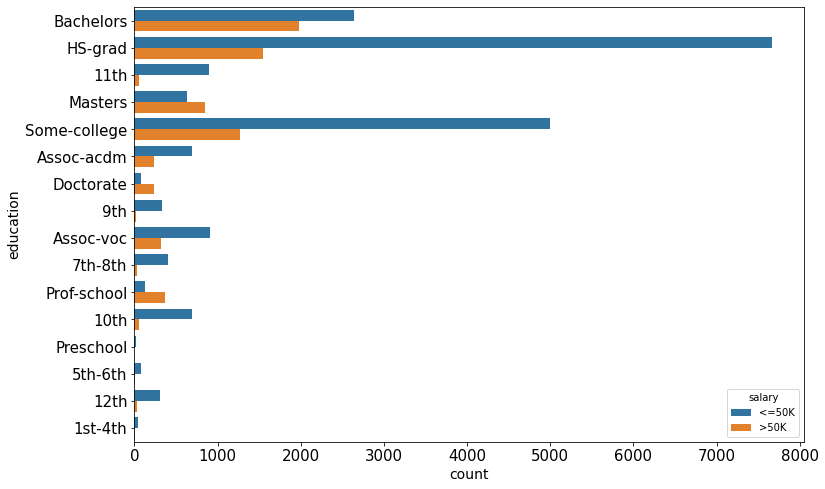

In [17]:
plt.subplots(figsize = (12,8))
g = sns.countplot(y='education', hue='salary', data=categorical_data)
g.tick_params(labelsize=15)
g.set_ylabel("education", fontsize=14)
g.set_xlabel("count", fontsize=14)

Text(0.5, 0, 'count')

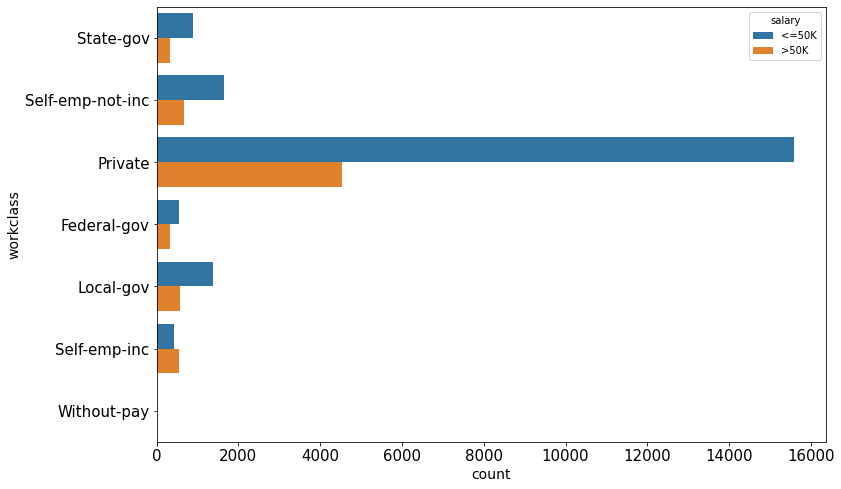

In [18]:
plt.subplots(figsize = (12,8))
g = sns.countplot(y='workclass', hue='salary', data=categorical_data)
g.tick_params(labelsize=15)
g.set_ylabel("workclass", fontsize=14)
g.set_xlabel("count", fontsize=14)


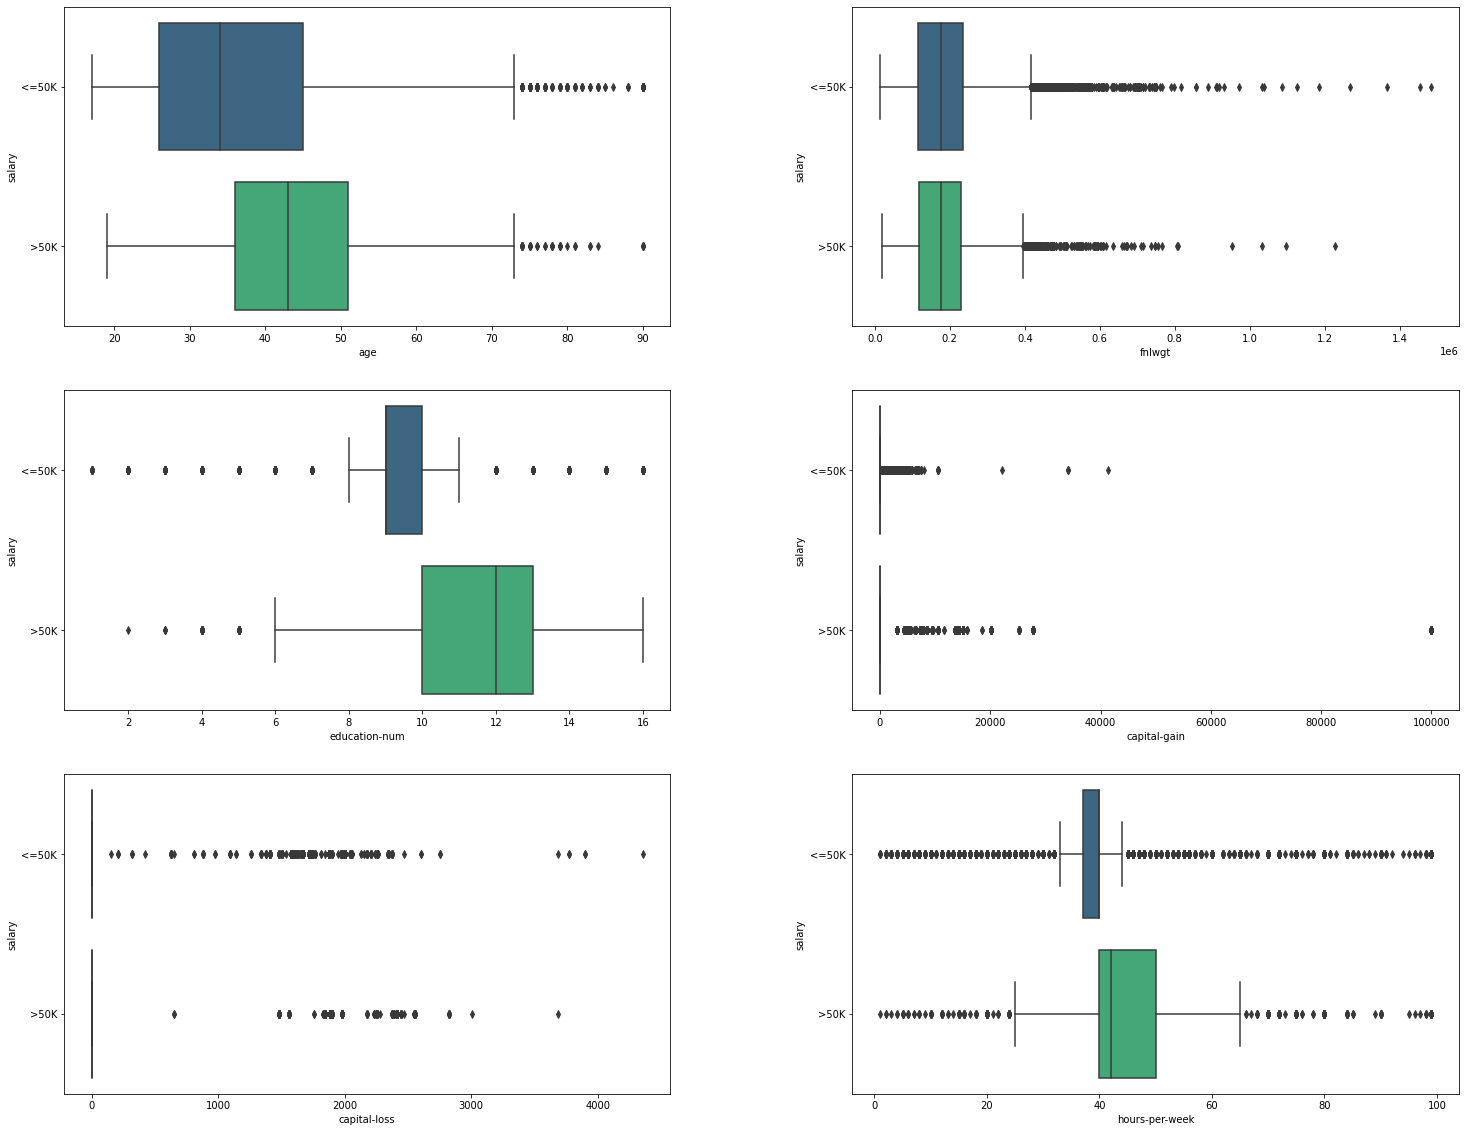

In [19]:
fig, axes = plt.subplots(3,2, figsize = (25,20))
plt.subplots_adjust(wspace = .3)
sub = []
for (i,col) in enumerate(int_data_with_target.columns):
  if col != 'salary':
    ax = sns.boxplot(x=col, y='salary', data=int_data_with_target, ax=axes[i//2, i-2*i//2+i%2], palette = "viridis")

# Feature pairwise correlation

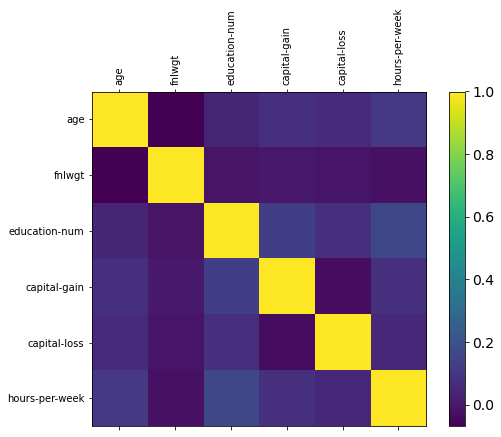

In [20]:
f = plt.figure(figsize=(8, 6))
plt.matshow(int_data.corr(), fignum=f.number)
plt.xticks(range(int_data.shape[1]), int_data.columns, fontsize=10, rotation=90)
plt.yticks(range(int_data.shape[1]), int_data.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [21]:
corr_matrix = int_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Features to drop:", to_drop)

Features to drop: []


We can notice from the graph that the numerical features have very low correlation values. For this reason none of the attributes is dropped.

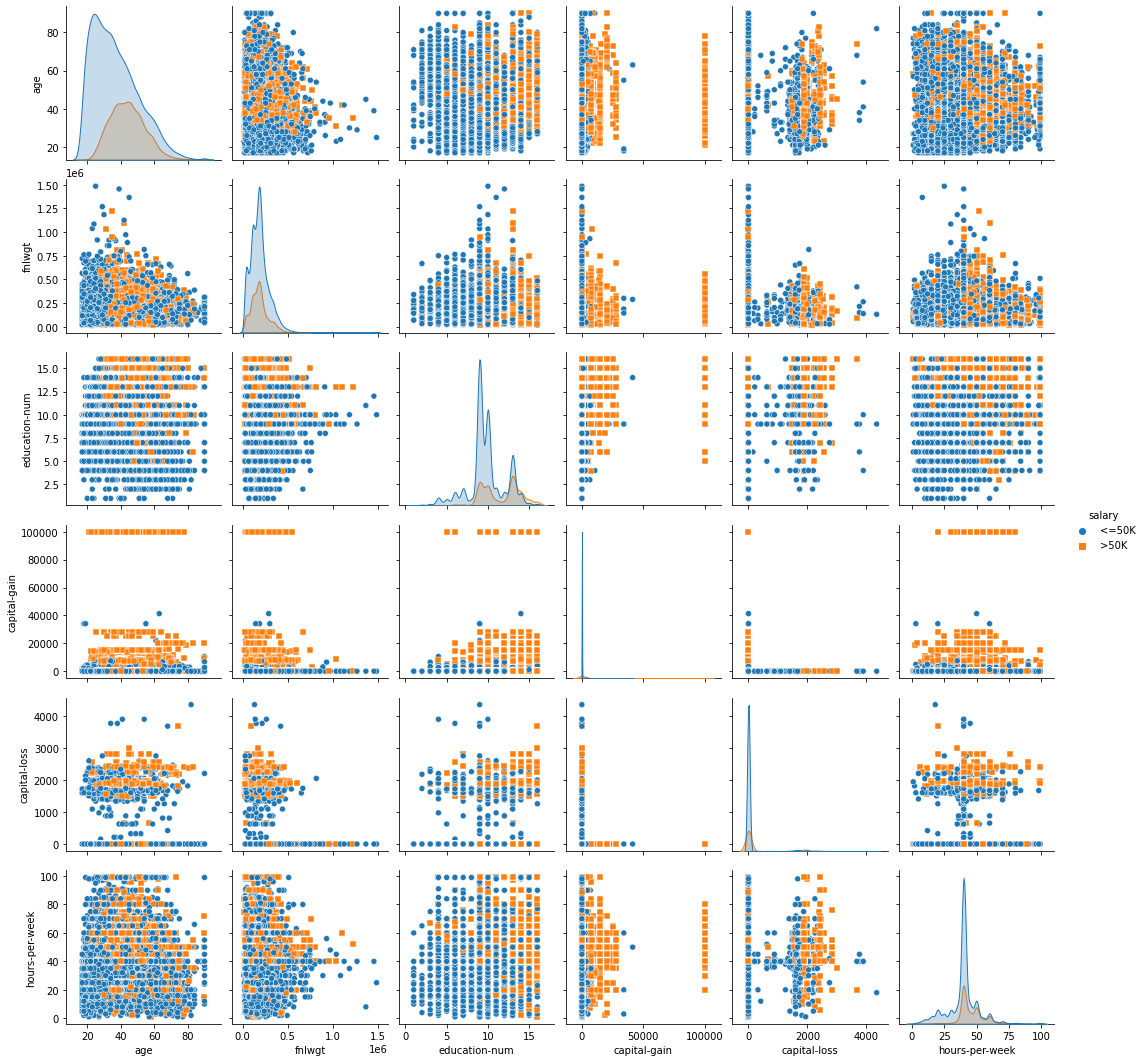

In [22]:
sns.pairplot(int_data_with_target, hue='salary', markers=['o','s'])

# Kernel density estimate

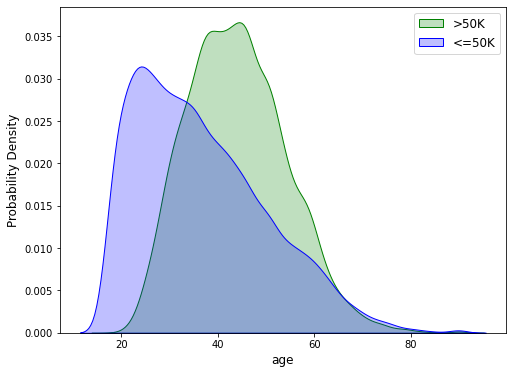

In [23]:
high_income_df = data[data['salary'] == '>50K']
low_income_df = data[data['salary'] == '<=50K']
def kde_plot(feature_name):
    plt.figure(figsize = (8,6))
    sns.kdeplot(high_income_df[feature_name], color='g', shade=True, Label= '>50K') 
    sns.kdeplot(low_income_df[feature_name], color='b', shade=True, Label= '<=50K') 
    plt.legend(fontsize = 12)
    plt.xlabel(feature_name, fontsize = 12) 
    plt.ylabel('Probability Density', fontsize = 12)

kde_plot('age')

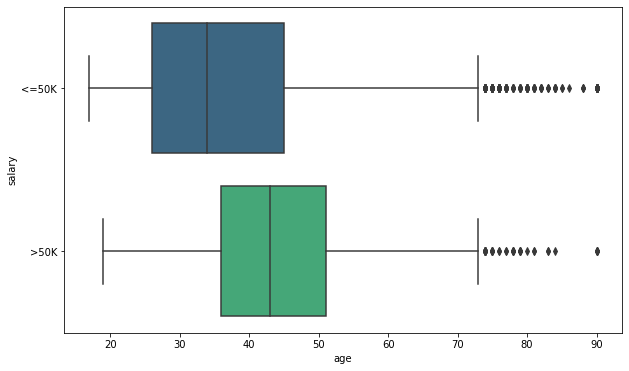

In [24]:
plt.subplots(figsize = (10,6))
sns.boxplot(x='age', y='salary', data=int_data_with_target, palette = "viridis")

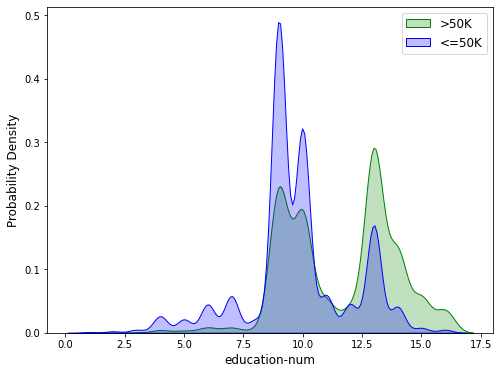

In [25]:
kde_plot('education-num')

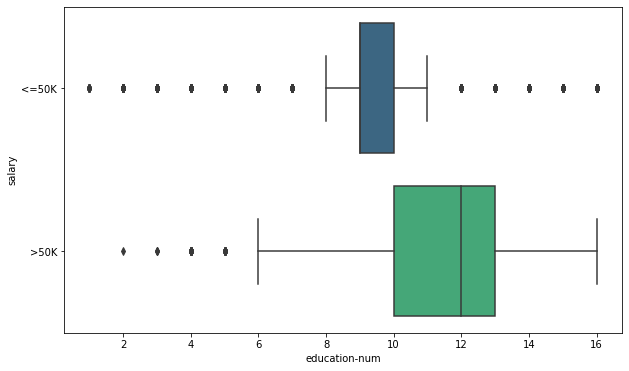

In [26]:
plt.subplots(figsize = (10,6))
sns.boxplot(x='education-num', y='salary', data=int_data_with_target, palette = "viridis")

# Dummy encoding 

In [27]:
y = data['salary']
y[y=='<=50K'] = 0
y[y=='>50K'] = 1
y=y.astype('int')
data_training = data.drop('salary', axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
X = pd.get_dummies(data_training).astype(np.float)
X = pd.concat((X, data['salary']), axis=1)
X.reset_index(drop=True, inplace=True)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,37.0,284582.0,14.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27499,27.0,257302.0,12.0,0.0,0.0,38.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
27500,40.0,154374.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
27501,58.0,151910.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
27502,22.0,201490.0,9.0,0.0,0.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


# Splitting data

In [29]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42, shuffle=True, stratify=data['salary'])

# Removing outliers only for training data

In [30]:
def remove_outliers(df, feature, q1, q2):
    df.loc[:,feature] = df[feature].astype(float)
    Q1 = df[feature].quantile(q1)
    Q3 = df[feature].quantile(q2)
    # IQR is interquartile range.
    IQR = Q3 - Q1   
    filter = (df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 *IQR)
    return df.loc[filter]

print(X_train['salary'].value_counts())

for f in ['age', 'fnlwgt', 'education-num', 'hours-per-week']:
    X_train = remove_outliers(X_train, f, 0.25, 0.75)

print(X_train['salary'].value_counts())
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train

0    14356
1     4896
Name: salary, dtype: int64
0    9794
1    3623
Name: salary, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary
0,24.0,189749.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,33.0,319854.0,13.0,4650.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,29.0,301582.0,10.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,32.0,33678.0,10.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,27.0,328981.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13412,25.0,124590.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
13413,43.0,313022.0,9.0,4386.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
13414,50.0,269095.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
13415,21.0,177711.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


# Normalization

In [31]:
scaler = StandardScaler()
y_train = X_train['salary'].astype('int')
X_train = X_train.loc[:, X_train.columns != 'salary']
X_train_numerical = X_train[int_data.columns]
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns=X_train_numerical.columns)

y_test = X_test['salary'].astype('int')
X_test = X_test.loc[:, X_test.columns != 'salary']
X_test_numerical = X_test[int_data.columns]
X_test_numerical = pd.DataFrame(scaler.fit_transform(X_test_numerical), columns=X_test_numerical.columns)

(array([-5. , -2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5]),
 <a list of 10 Text major ticklabel objects>)

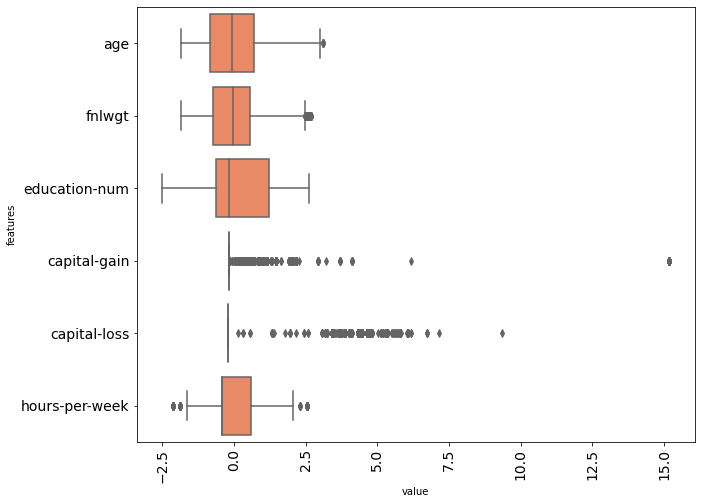

In [32]:
all_data_normalized = pd.concat([y_train, X_train_numerical], axis=1)
all_data_normalized = pd.melt(all_data_normalized, id_vars="salary",
                    var_name="features",
                    value_name='value')

f = plt.figure(figsize=(10,8))
g = sns.boxplot(y="features",x="value", data=all_data_normalized, color='coral')
g.tick_params(labelsize=14)
plt.xticks(rotation=90)

In [ ]:
# Reconstruction of the train and test sets after normalization
X_train.loc[:, X_train_numerical.columns] = X_train_numerical
X_test.loc[:, X_test_numerical.columns] = X_test_numerical

# Dimensionality reduction

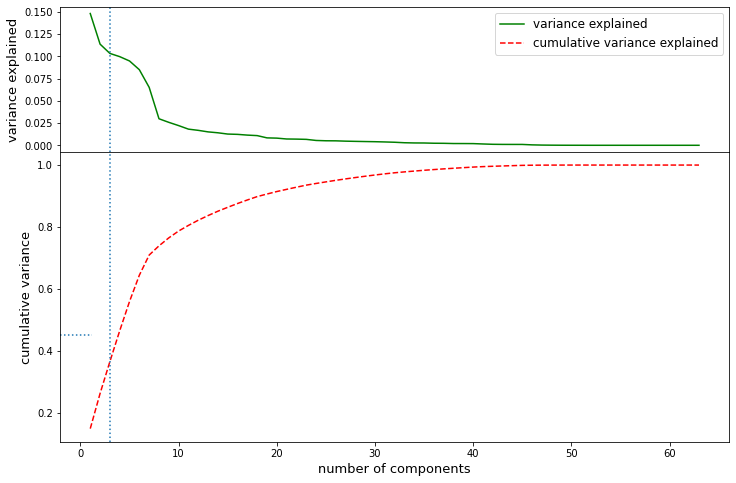

To explain the 45.00% of the total variance we need 3 components.


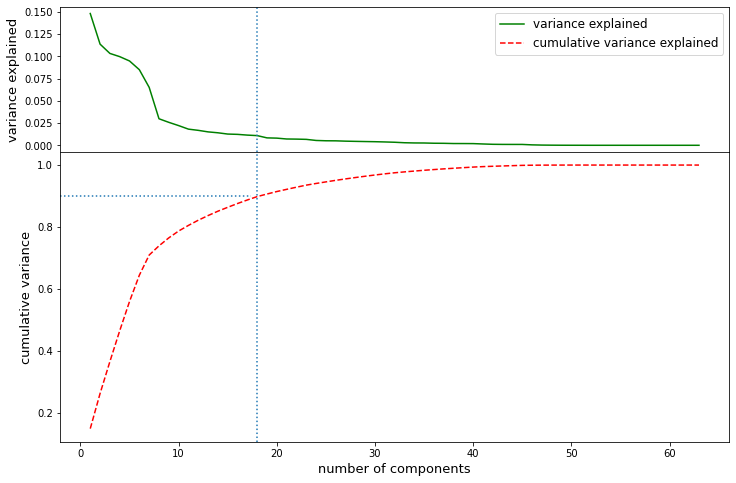

To explain the 90.00% of the total variance we need 18 components.


In [34]:
# PCA dimensionality reduction

def compute_PCA(X, cum_var_tresh = 0.8, res = False):
    
    pca = PCA().fit(X)
    var_exp = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
    n_comp = np.where(cum_var_exp >= cum_var_tresh)[0][0]
    x = list(range(1, len(var_exp) + 1))

    fig = plt.figure(figsize = (12, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2]) 

    ax0 = plt.subplot(gs[0])
    line0, = ax0.plot(x, var_exp, color='g')

    ax1 = plt.subplot(gs[1], sharex = ax0)
    line1, = ax1.plot(x, cum_var_exp, color='r', linestyle='--')

    ax0.axvline(n_comp, linestyle = ":")
    ax1.axvline(n_comp, linestyle = ":")
    ax1.axhline(cum_var_tresh, 0, n_comp/len(var_exp), linestyle = ":")

    ax0.legend((line0, line1), ('variance explained', 'cumulative variance explained'), loc='upper right',fontsize=12)
    ax0.set_ylabel("variance explained",fontsize=13)
    ax1.set_xlabel("number of components",fontsize=13)
    ax1.set_ylabel("cumulative variance",fontsize=13)

    plt.subplots_adjust(hspace=.0)
    plt.show()

    if res:
      return pca
    else:
      return n_comp

cum_var_treshold = 0.45
n_components = compute_PCA(X_train, cum_var_treshold)
print(f"To explain the {cum_var_treshold*100:.2f}% of the total variance we need {n_components} components.")

cum_var_treshold = 0.9
n_components = compute_PCA(X_train, cum_var_treshold)
print(f"To explain the {cum_var_treshold*100:.2f}% of the total variance we need {n_components} components.")


Generate train and test after reduction (PCA fitted on the train set).

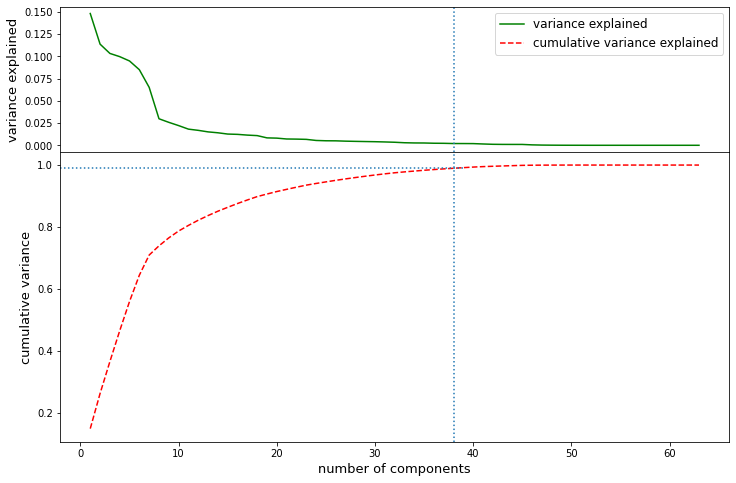

In [35]:
cum_var_treshold = 0.99
pca = compute_PCA(X_train, cum_var_treshold, res=True)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

           age    fnlwgt  education-num  ...  sex_Female  sex_Male    salary
PC-1  0.446133 -0.089106       0.487788  ...   -0.117617  0.117617  0.207743
PC-2  0.564240 -0.217294      -0.615662  ...   -0.097802  0.097802  0.011817

[2 rows x 64 columns]


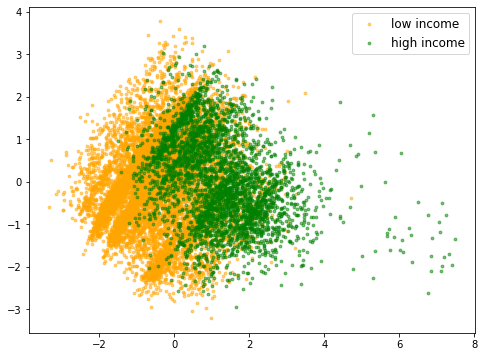

In [36]:
# PCA in 2D
X = pd.concat((X_train,y_train), axis=1)
pca = PCA(n_components=2, random_state=10)
X_svd = pd.DataFrame(pca.fit_transform(X))
low_indexes = X[X['salary'] == 0].index
high_indexes = X[X['salary'] == 1].index

X_low = X_svd.loc[low_indexes]
X_high = X_svd.loc[high_indexes]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_low[0], X_low[1], s=8, color='orange', alpha=0.5, label='low income')
ax.scatter(X_high[0], X_high[1], s=8, color='green', alpha=0.5, label='high income')
plt.legend(loc='upper right', fontsize=12)

print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2']))

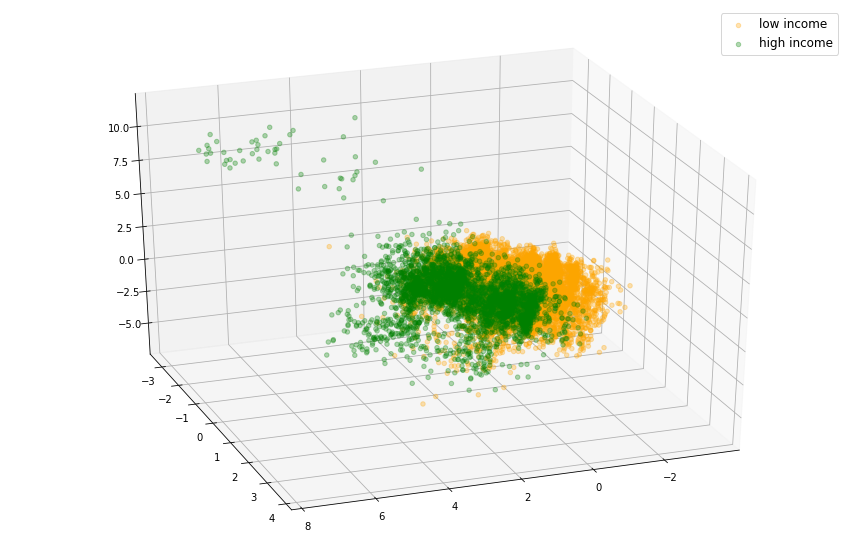

In [37]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt

pca = PCA(n_components=3, random_state=10)
X_svd = pd.DataFrame(pca.fit_transform(X))
low_indexes = X[X['salary'] == 0].index
high_indexes = X[X['salary'] == 1].index

X_low = X_svd.loc[low_indexes]
X_high = X_svd.loc[high_indexes]


fig = plt.figure(figsize = (15, 10)) 
ax = plt.axes(
    projection ="3d") 
ax.view_init(30,70)

ax.scatter3D(X_low[0], X_low[1], X_low[2], color='orange', alpha=0.3, label='low income')
ax.scatter3D(X_high[0], X_high[1], X_high[2], color='green', alpha=0.3, label='high income')
plt.legend(loc='upper right', fontsize=12)


In [38]:
y_train = y_train.values

# Oversampling using SMOTE technique

In [132]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(sampling_strategy= 1., random_state=10)

X_oversampling, y_oversampling = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_oversampling))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 9794, 1: 9794})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


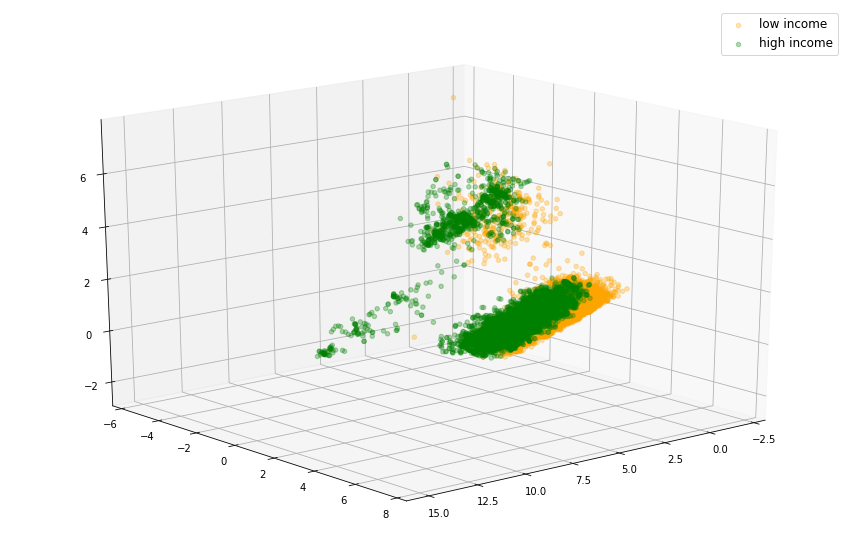

In [133]:
X = X_oversampling
pca = PCA(n_components=3, random_state=10)
X_svd = pd.DataFrame(pca.fit_transform(X))

low_indexes =[ y_oversampling == 0]
high_indexes = [y_oversampling==1]
X_low = X_svd.values[low_indexes]
X_high = X_svd.values[high_indexes]

fig = plt.figure(figsize = (15, 10)) 
ax = plt.axes(
    projection ="3d") 
ax.view_init(20,50)

ax.scatter3D(X_low[:,0], X_low[:,1], X_low[:,2], color='orange', alpha=0.3, label='low income')
ax.scatter3D(X_high[:,0], X_high[:,1], X_high[:,2], color='green', alpha=0.3, label='high income')

plt.legend(loc='upper right', fontsize=12)

In [134]:
y_oversampling = y_oversampling.astype('int')
y_oversampling

array([0, 0, 0, ..., 1, 1, 1])

# Training dataset split for classification


In [39]:
X_train = X_train_PCA
X_test = X_test_PCA

In [40]:
X_train_p = X_train[y_train==0]
X_train_n = X_train[y_train==1]

In [41]:
import random
def create_split(X1,X2,y1,y2) :
  X = np.concatenate((X1,X2), axis=0)
  y = np.concatenate((y1,y2), axis=0)
  print(X.shape, y.shape)
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  X = X[indices]
  y = y[indices]
  return X,y


In [42]:
split_n = len(X_train_p) // 2
X_train_1 = X_train_p[:split_n]
X_train_2 = X_train_p[split_n//2:-split_n//2]
X_train_3 = X_train_p[-split_n:]
y_train_p = np.zeros(split_n)
y_train_n = np.ones(len(X_train_n))
X_train_1,y_train_1= create_split(X_train_1,X_train_n,y_train_p,y_train_n)
X_train_2,y_train_2= create_split(X_train_2,X_train_n,y_train_p,y_train_n)
X_train_3,y_train_3= create_split(X_train_3,X_train_n,y_train_p,y_train_n)
Xs = [X_train_1, X_train_2, X_train_3]
ys = [y_train_1, y_train_2, y_train_3]

(8520, 63) (8520,)
(8520, 63) (8520,)
(8520, 63) (8520,)


# Classification functions


In [43]:
def get_predictions(pred_list):
  predictions = []
  for (p1,p2,p3) in zip(pred_list[0],pred_list[1],pred_list[2]):
    p = max([p1,p2,p3], key = [p1,p2,p3].count)
    predictions.append(p)
  return predictions

def performance(y_test,y_pred):
        print(classification_report(y_test, y_pred))
        print("F1 score: ",f1_score(y_test, y_pred, average='weighted'))
        cf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(cf_matrix, annot=True, cmap='Reds')
        plt.show()

def split_data_classification(Xs,ys,clf,report=True):
  preds = []
  for (X_res,y_res) in zip(Xs,ys):
      clf.fit(X_res, y_res)
      if report:
        print("Best paramenters: ", clf.best_params_)
        print("Best score: ",clf.best_score_)
      y_pred = clf.predict(X_test)
      preds.append(y_pred)
  return preds


def data_classification(X,y,clf,report=True, train_preds=False):
  clf.fit(X, y)
  y_pred = clf.predict(X_test)
  if report:
    print("Best paramenters: ", clf.best_params_)
    print("Best score: ",clf.best_score_)
    print(classification_report(y_test, y_pred))
    print("F1 score: ",f1_score(y_test, y_pred, average='weighted'))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='Reds')
    plt.show()
  if train_preds:
    train_pred = clf.predict(X)
    return y_pred, train_pred
  else:
    return y_pred
    
def plot_f1(f1_w, f1_h, acc, param, name='C'):
  styles = ['bs-', 'gs-','ro--']
  f1 = pd.DataFrame(columns=[name,'f1_weighted','f1_high-income_class','accuracy'])
  f1[name] = param
  f1['f1_weighted'] = f1_w
  f1['f1_high-income_class'] = f1_h
  f1['accuracy'] = acc
  f1.plot(x=name, figsize = (10, 6), ylim = (0.5,1.0), style = styles, markersize = 10 )
  plt.show()

def plot_acc(acc1, acc2, param, name='C'):
  styles = ['yo-', 'go-']
  f1 = pd.DataFrame(columns=[name,'accuracy_train','accuracy_test'])
  f1[name] = param
  f1['accuracy_train'] = acc1
  f1['accuracy_test'] = acc2
  f1.plot(x=name, figsize = (10, 6), ylim = (0.5,1.0), style = styles, markersize = 10 )
  plt.show()


# Decision tree classifier

In [140]:
parameters = {'criterion':['gini'], 'splitter':['best', 'random'], 'max_depth':[1,3,5,7,9,11,13]}
gs = GridSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state=10), parameters, scoring='f1_weighted')

Best paramenters:  {'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}
Best score:  0.7897836820077174
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6153
           1       0.54      0.80      0.65      2099

    accuracy                           0.78      8252
   macro avg       0.73      0.79      0.74      8252
weighted avg       0.82      0.78      0.79      8252

F1 score:  0.7900585594389522


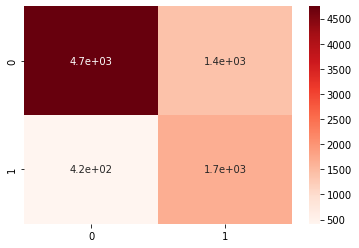

0.7785991274842462

In [141]:
y_pred = data_classification(X_train,y_train,gs)
accuracy_score(y_test,y_pred)

# Bagged Trees classifier

In [142]:
parameters = {'n_estimators':[10,15,20,25,30]}
gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=9, splitter='best', random_state=10,class_weight='balanced')), parameters, scoring='f1_weighted')

Best paramenters:  {'n_estimators': 30}
Best score:  0.8183623595015754
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6153
           1       0.61      0.78      0.68      2099

    accuracy                           0.82      8252
   macro avg       0.76      0.81      0.78      8252
weighted avg       0.84      0.82      0.82      8252

F1 score:  0.8223926341961422


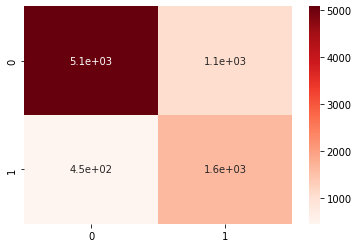

0.8154386815317499

In [143]:
y_pred = data_classification(X_train,y_train,gs)
accuracy_score(y_test,y_pred)

# Random Forest classifier

In [144]:
parameters = {'n_estimators':[100,150,200,250]}
gs = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=10), parameters, scoring='f1_weighted')

Best paramenters:  {'n_estimators': 250}
Best score:  0.8161379866457017
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6153
           1       0.74      0.57      0.64      2099

    accuracy                           0.84      8252
   macro avg       0.80      0.75      0.77      8252
weighted avg       0.83      0.84      0.83      8252

F1 score:  0.831808059107469


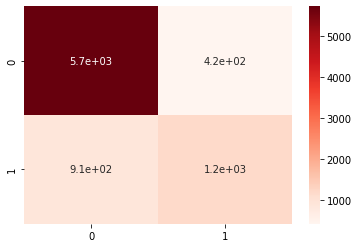

0.8393116820164809

In [145]:
y_pred = data_classification(X_train,y_train,gs)
accuracy_score(y_test,y_pred)

# AdaBoost classifier on trees

Best paramenters:  {'n_estimators': 150}
Best score:  0.7993206094950596
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6153
           1       0.59      0.71      0.64      2099

    accuracy                           0.80      8252
   macro avg       0.74      0.77      0.75      8252
weighted avg       0.81      0.80      0.80      8252

F1 score:  0.8047537767344323


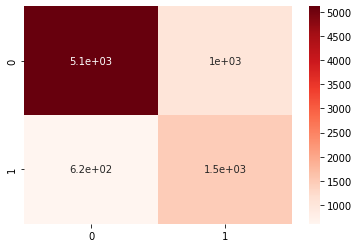

0.7990790111488124

In [160]:
parameters = {'n_estimators':[100,150,200,250]}
gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced',criterion='gini', max_depth=3, splitter='best', random_state=10)), parameters, scoring='f1_weighted')
y_pred = data_classification(X_train,y_train,gs)
accuracy_score(y_test,y_pred)

# Support Vector Machines classifier

Best paramenters:  {'C': 10, 'kernel': 'rbf'}
Best score:  0.8017440216675842
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      6153
           1       0.59      0.81      0.68      2099

    accuracy                           0.81      8252
   macro avg       0.76      0.81      0.77      8252
weighted avg       0.84      0.81      0.82      8252

F1 score:  0.816545674673601


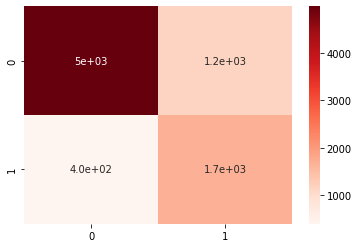

0.8080465341735337

In [175]:
parameters = {'C':[0.1,1,10,100], 'kernel':['rbf']}
gs = GridSearchCV(SVC(class_weight='balanced',random_state=10), parameters, scoring='accuracy')
y_pred = data_classification(X_train,y_train,gs)
accuracy_score(y_test,y_pred)

# K-Nearest Neighbors classifier

Best paramenters:  {'n_neighbors': 19, 'weights': 'uniform'}
Best score:  0.8224637322924657
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6153
           1       0.69      0.61      0.65      2099

    accuracy                           0.83      8252
   macro avg       0.78      0.76      0.77      8252
weighted avg       0.83      0.83      0.83      8252

F1 score:  0.8292017134867147


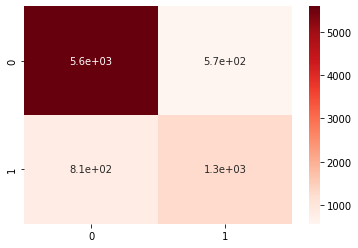

0.8327678138633059

In [48]:
parameters = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21], 'weights':['uniform', 'distance']}
gs = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy')
y_pred = data_classification(X_train,y_train,gs)
accuracy_score(y_test,y_pred)

# Performances Decision Tree 

In [165]:
n = [3,5,7,9,11,13,15,17]
f1_weighted = []
f1_high = []
acc = []
acc_train = []
for c in n:
  clf = DecisionTreeClassifier(criterion='gini', max_depth=c, splitter='best', random_state=10,class_weight='balanced')
  y_pred, train_pred = data_classification(X_train,y_train,clf, report=False, train_preds=True)
  f1_high.append(f1_score(y_test, y_pred))
  f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))
  acc.append(accuracy_score(y_test, y_pred))
  acc_train.append(accuracy_score(y_train,train_pred))


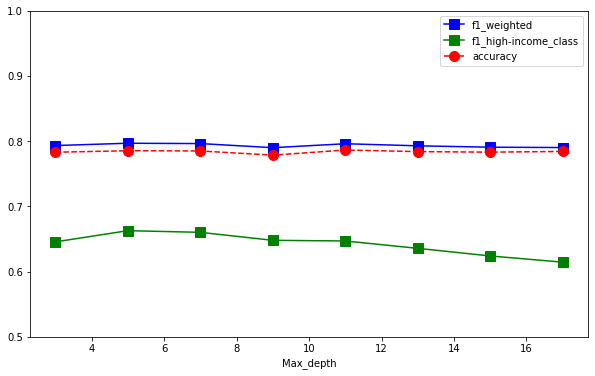

In [166]:
plot_f1(f1_weighted,f1_high,acc,n,name='Max_depth')

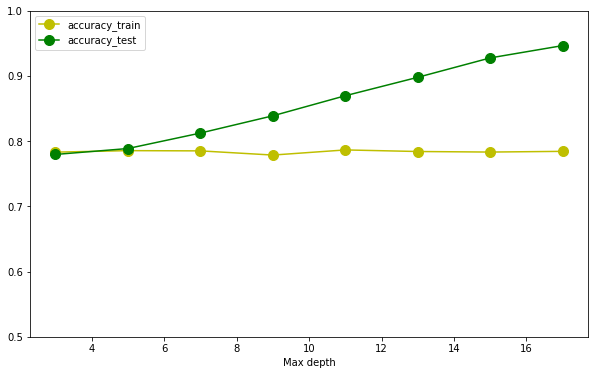

In [169]:
plot_acc(acc,acc_train,n,name='Max depth')

# Trees performances varying max_depth

Classifier tree with max depth 1.

Classifier bagging with max depth 1.

Classifier forest with max depth 1.

Classifier boosting with max depth 1.

Classifier tree with max depth 2.

Classifier bagging with max depth 2.

Classifier forest with max depth 2.

Classifier boosting with max depth 2.

Classifier tree with max depth 3.

Classifier bagging with max depth 3.

Classifier forest with max depth 3.

Classifier boosting with max depth 3.

Classifier tree with max depth 4.

Classifier bagging with max depth 4.

Classifier forest with max depth 4.

Classifier boosting with max depth 4.

Classifier tree with max depth 5.

Classifier bagging with max depth 5.

Classifier forest with max depth 5.

Classifier boosting with max depth 5.

Classifier tree with max depth 7.

Classifier bagging with max depth 7.

Classifier forest with max depth 7.

Classifier boosting with max depth 7.

Classifier tree with max depth 9.

Classifier bagging with max depth 9.

Classifier forest with max depth 

Text(0, 0.5, 'Accuracy')

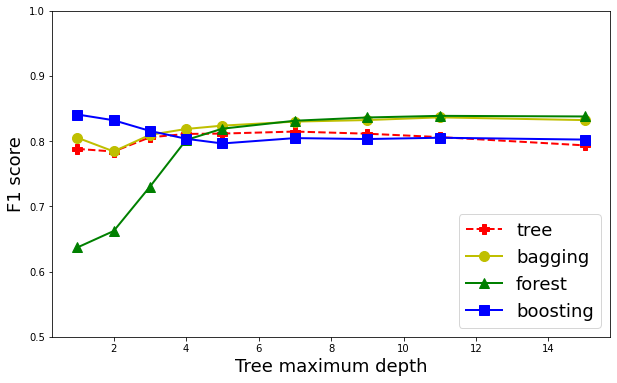

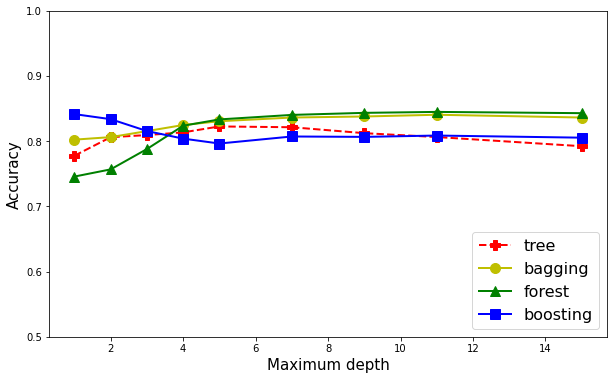

In [180]:
# grafico performance alberi vs profondità
# grafico performance alberi vs num_estimatori
df_tree_results_f1 = pd.DataFrame(columns = ["max_depth", "tree", "bagging", "forest", "boosting"])
df_tree_results_acc = pd.DataFrame(columns = ["max_depth", "tree", "bagging", "forest", "boosting"])

depths = [1, 2, 3, 4, 5, 7, 9, 11, 15]

for depth in depths:
    
    tree = DecisionTreeClassifier(max_depth = depth, criterion='gini',random_state = 10)
    bag = BaggingClassifier(base_estimator = tree, n_estimators = 30, random_state = 10)
    forest = RandomForestClassifier(max_depth = depth, n_estimators = 250, random_state = 10)
    boost = AdaBoostClassifier(base_estimator = tree, n_estimators = 100, random_state = 10)

    
    clfs = {
                "tree": tree,
                "bagging" : bag,
                "forest": forest,
                "boosting": boost
    }
    
    results_f1 = {
        "max_depth": depth if depth is not None else "inf"
    }
    results_acc = {
        "max_depth": depth if depth is not None else "inf"
    }
    
    
    for k in clfs.keys():
        
        print(f"Classifier {k} with max depth {depth}.")
        clf = clfs[k]
        y_pred = data_classification(X_train,y_train,clf,report=False)

        f1 = f1_score(y_test, y_pred,average='weighted')
        acc = accuracy_score(y_test, y_pred)
        #print(f"Train accuracy: {acc:.2f}")
        results_f1[k] = f1
        results_acc[k] = acc
        print("")
        
    df_tree_results_f1 = df_tree_results_f1.append(results_f1, ignore_index = True)
    df_tree_results_acc = df_tree_results_acc.append(results_acc, ignore_index = True)

    
# plotting the results

df_tree_results_f1.set_index("max_depth")
df_tree_results_acc.set_index("max_depth")

styles = ['rP--', 'yo-', 'g^-', 'bs-']
lws = [2, 2, 2, 2]

ax = df_tree_results_f1.plot(x = "max_depth", figsize = (10, 6), ylim = (0.5,1), style = styles, markersize = 10)
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=lws[i])
             
plt.legend(loc="lower right", fontsize = 16)
plt.xlabel("Maximum depth", fontsize = 15)
plt.ylabel("F1 score",  fontsize = 15)

ax = df_tree_results_acc.plot(x = "max_depth", figsize = (10, 6), ylim = (0.5,1), style = styles, markersize = 10)
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=lws[i])
             
plt.legend(loc="lower right", fontsize = 16)
plt.xlabel("Maximum depth", fontsize = 15)
plt.ylabel("Accuracy",  fontsize = 15)

# Performances SVM

In [176]:
C = ['0.1','1','10','100','1000']
f1_weighted = []
f1_high = []
acc = []
for c in [0.1,1,10,100,1000]:
  clf = SVC(C=c,class_weight='balanced',random_state=10)
  y_pred = data_classification(X_train,y_train,clf, report=False)
  f1_high.append(f1_score(y_test, y_pred))
  f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))
  acc.append(accuracy_score(y_test, y_pred))


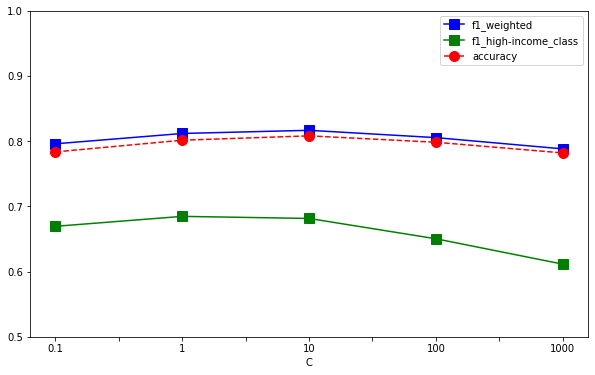

In [177]:
plot_f1(f1_weighted,f1_high,acc,C)

# Performances KNN

In [49]:
n = [3,5,7,9,11,13,15,17,19,21]
f1_weighted = []
f1_high = []
acc = []
acc_train = []
for c in n:
  clf = KNeighborsClassifier(n_neighbors=c)
  y_pred, train_pred = data_classification(X_train,y_train,clf, report=False, train_preds=True)
  f1_high.append(f1_score(y_test, y_pred))
  f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))
  acc.append(accuracy_score(y_test, y_pred))
  acc_train.append(accuracy_score(y_train,train_pred))


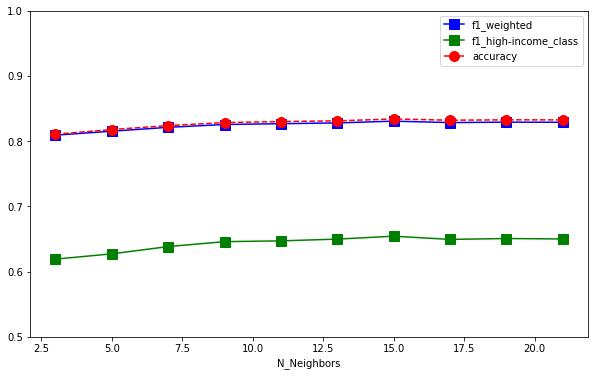

In [50]:
plot_f1(f1_weighted,f1_high,acc,n,name='N_Neighbors')

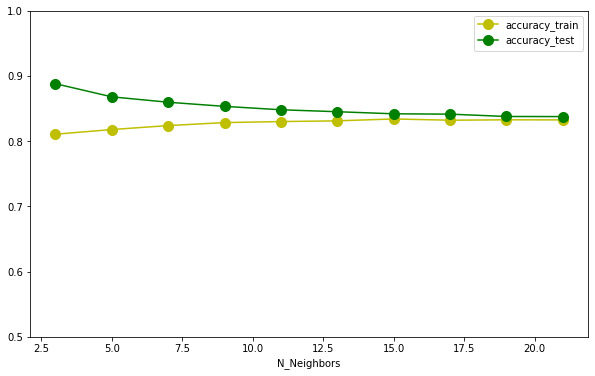

In [51]:
plot_acc(acc,acc_train,n,name='N_Neighbors')